In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(
    'nonvoters_data.csv')

# Clean up data
## Right now our data is hard to read 

### Question one  
#### "Are you a U.S. citizen?"
1. Yes
2. No 

### If all respondents were US citizens, does it make sense to include this variable?

#### Let's find out.

In [10]:
df['Q1'].value_counts()

1    5836
Name: Q1, dtype: int64

### We're dropping it!

In [11]:
df = df.drop(['Q1'], axis=1)

### How about question two?

### Question 2

In your view, how important are each of the following to being a good American?

Randomize
1. Voting in elections
2. Serving on a jury
3. Following what happens in government and politics
4. Displaying the American flag
5. Participating in the U.S. Census every ten years
6. Knowing the Pledge of Allegiance
7. Supporting the military
8. Respecting the opinions of those who disagree with you
9. Believing in God
10. Protesting if you believe government actions are wrong


Responses
1.​ ​Very important
2.​ ​Somewhat important
3.​ ​Not so important
4.​ ​Not at all important


### We'll create a dictionary so we know the values of our columns

In [12]:
columns=list(df)

index_values = list(range(0,118))

dictionary = dict(zip(columns, index_values))

for i in dictionary:
    print (i, dictionary[i])


RespId 0
weight 1
Q2_1 2
Q2_2 3
Q2_3 4
Q2_4 5
Q2_5 6
Q2_6 7
Q2_7 8
Q2_8 9
Q2_9 10
Q2_10 11
Q3_1 12
Q3_2 13
Q3_3 14
Q3_4 15
Q3_5 16
Q3_6 17
Q4_1 18
Q4_2 19
Q4_3 20
Q4_4 21
Q4_5 22
Q4_6 23
Q5 24
Q6 25
Q7 26
Q8_1 27
Q8_2 28
Q8_3 29
Q8_4 30
Q8_5 31
Q8_6 32
Q8_7 33
Q8_8 34
Q8_9 35
Q9_1 36
Q9_2 37
Q9_3 38
Q9_4 39
Q10_1 40
Q10_2 41
Q10_3 42
Q10_4 43
Q11_1 44
Q11_2 45
Q11_3 46
Q11_4 47
Q11_5 48
Q11_6 49
Q14 50
Q15 51
Q16 52
Q17_1 53
Q17_2 54
Q17_3 55
Q17_4 56
Q18_1 57
Q18_2 58
Q18_3 59
Q18_4 60
Q18_5 61
Q18_6 62
Q18_7 63
Q18_8 64
Q18_9 65
Q18_10 66
Q19_1 67
Q19_2 68
Q19_3 69
Q19_4 70
Q19_5 71
Q19_6 72
Q19_7 73
Q19_8 74
Q19_9 75
Q19_10 76
Q20 77
Q21 78
Q22 79
Q23 80
Q24 81
Q25 82
Q26 83
Q27_1 84
Q27_2 85
Q27_3 86
Q27_4 87
Q27_5 88
Q27_6 89
Q28_1 90
Q28_2 91
Q28_3 92
Q28_4 93
Q28_5 94
Q28_6 95
Q28_7 96
Q28_8 97
Q29_1 98
Q29_2 99
Q29_3 100
Q29_4 101
Q29_5 102
Q29_6 103
Q29_7 104
Q29_8 105
Q29_9 106
Q29_10 107
Q30 108
Q31 109
Q32 110
Q33 111
ppage 112
educ 113
race 114
gender 115
income_cat 116
vo

### Now we'll create a dictionary with our old and new values to rename for question two

In [13]:
old_values = [" Q2_1 ",
" Q2_2 ",
" Q2_3 ",
" Q2_4 ",
" Q2_5 ",
" Q2_6 ",
" Q2_7 ",
" Q2_8 ",
" Q2_9 ",
" Q2_10 "]

new_values= ["imp-voting", "imp-jury-duty", "knowing-happenings", "display-flag", "census-partcip", "pledge-alleg", "military-support", "respect-opinion", "believe-god", "protest-govt-wrong"]

new_dictionary = dict(zip(old_values, new_values))

def values():
    for i in new_dictionary:
        print('"',i,'":"',new_dictionary[i],'",')
       

question_two_new = df.rename(columns={"Q2_1":"imp-voting",
"Q2_2":"imp-jury-duty",
"Q2_3":"knowing-happenings",
"Q2_4":"display-flag",
"Q2_5":"census-partcip",
"Q2_6":"pledge-alleg",
"Q2_7":"military-support",
"Q2_8":"respect-opinion",
"Q2_9":"believe-god",
"Q2_10":"protest-govt-wrong"})

question_two_new= df.iloc[:,2:12]



#### Subset of our data

In [14]:
question_two_new.describe()


,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10
count,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000
mean,1.246402,1.705106,1.638280,2.175977,1.277245,1.805517,1.491604,1.464016,2.093557,2.019363
std,0.660253,0.866346,0.765741,1.091391,0.626386,1.011524,0.808120,0.674857,1.245036,0.946632
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
75%,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


#### Why is -1 the min for all these values? 

The question asks the respondents to answer on a scale of 1-4 with 1 being the most important. 

-means invalid (RH to check codebook)

### Question 3

#### How much do you agree or disagree with the following statements?

1.Systemic racism is a problem in the United States.

2.Systemic racism in policing is a bigger problem than violence and vandalism
in protests.

3.​ ​Society as a whole has become too soft and feminine.

4.​ ​The mainstream media is more interested in making money than telling the
truth.

5.​ ​Traditional parties and politicians don’t care about people like me.

6.​ ​The way people talk needs to change with the times to be more sensitive to
people with different backgrounds.

1.​ ​Strongly agree
2.​ ​Somewhat agree
3.​ ​Somewhat disagree
4.​ ​Strongly disagree

We'll also want to add race to our index so we can do some interesting analysis

In [48]:
df.columns.get_loc('race') #get the index number -- > 114

question_three_old= df.iloc[:, np.r_[:,12:18, 114]]


question_three_old.describe()

nums = range (1,7)

new_values= ["racism_us", "racism_policing", "society_fem", "mainsteam_media", "traditional_parties", "ppl_talk_diff_background"]


new_values_with_quotes = []

new_list=[]

for value in new_values:
    new_values_with_quotes.append('"'+value+'",')

for num in nums: 
    new_list.append('"Q3_'+str(num)+'"'+":")
    
    new_dict= dict(zip(new_list, new_values_with_quotes))

#for i in new_dict: use this to population columns
 #   print (i, new_dict[i])

    
question_three_new = question_three_old.rename(columns={"Q3_1": "racism_us","Q3_2": "racism_policing",
"Q3_3": "society_femenine",
"Q3_4": "mainsteam_media",
"Q3_5": "traditional_parties",
"Q3_6": "ppl_talk_diff_background"})

question_three_new



,racism_us,racism_policing,society_femenine,mainsteam_media,traditional_parties,ppl_talk_diff_background,race
0,1,1,4,4,3,2,White
1,3,3,4,3,3,2,White
2,2,2,3,3,2,2,White
3,1,1,4,4,2,1,Black
4,4,-1,1,1,2,4,White
...,...,...,...,...,...,...,...
5831,1,1,3,1,1,2,Hispanic
5832,1,1,3,2,2,1,White
5833,1,3,4,2,4,2,Other/Mixed
5834,4,3,3,3,3,3,Black


<AxesSubplot:xlabel='race', ylabel='mainsteam_media'>

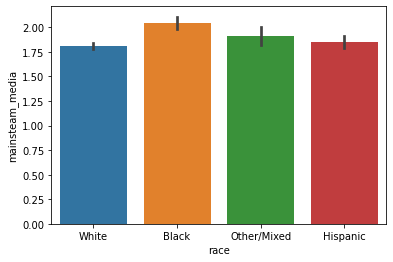

In [55]:
sns.barplot(x="race", y="mainsteam_media",data=question_three_new)
 ## why is this not showing 


In [27]:
question_three_new.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   racism_us                 5836 non-null   int64
 1   racism_policing           5836 non-null   int64
 2   society_femenine          5836 non-null   int64
 3   mainsteam_media           5836 non-null   int64
 4   traditional_parties       5836 non-null   int64
 5   ppl_talk_diff_background  5836 non-null   int64
dtypes: int64(6)
memory usage: 273.7 KB


racism_us                   1
racism_policing             1
society_femenine            4
mainsteam_media             4
traditional_parties         2
ppl_talk_diff_background    1
Name: 3, dtype: int64

# Ideas for further analysis

Are certain answers more related? 

t test
Had bunch of different surveys, ask people 


### Question 4

#### How much of an impact, if any, do each of the following have on your life?

1.​ ​Elected officials in Washington, D.C. (e.g. the president, member of Congress)

2.​ ​Elected officials in my state (e.g. governor, state representative)

3.​ ​Elected officials in my city or community (e.g. mayor, city council)

4.​ ​The news media

5.​ ​Large financial institutions on Wall Street

6.​ ​Law enforcement and the legal system

##### Responses 
1.​ ​A significant impact

2.​ ​Somewhat of an impact

3.​ ​Just a slight impact

4.​ ​No impact at all

In [19]:
question_four_old= df.iloc[:,18:23]

nums = range (1,7)

new_values= ["dc_elected_officials", "estate_elected_officials", "city_elected_officials", "news_media", "wall_street", "law_enforcement"]


new_values_with_quotes = []

new_list=[]

for value in new_values:
    new_values_with_quotes.append('"'+value+'",')

for num in nums: 
    new_list.append('"Q4_'+str(num)+'"'+":")
    
new_dict= dict(zip(new_list, new_values_with_quotes))

for i in new_dict: #use this to populate columns
    print (i, new_dict[i])
    
question_four_new = question_four_old.rename(columns={"Q4_1": "dc_elected_officials",
"Q4_2": "dc_elected_officials",
"Q4_3": "city_elected_officials",
"Q4_4": "news_media",
"Q4_5": "wall_street",
"Q4_6": "law_enforcement"})

question_four_new.describe()


"Q4_1": "dc_elected_officials",
"Q4_2": "estate_elected_officials",
"Q4_3": "city_elected_officials",
"Q4_4": "news_media",
"Q4_5": "wall_street",
"Q4_6": "law_enforcement",


,dc_elected_officials,dc_elected_officials,city_elected_officials,news_media,wall_street
count,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000
mean,1.795922,1.829335,2.002913,2.432317,2.338588
std,0.917687,0.892511,0.926146,1.030991,1.036849
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000


### Question 5

#### As far as making progress on the important issues facing the country, does it really matter who wins the 2020 presidential election, or will things be pretty much the same regardless of who is elected president?

1. Who wins the election really matters
2. Things will be pretty much the same



In [20]:
df.iloc[:,24].describe()


count    5836.00000
mean        1.15987
std         0.40769
min        -1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: Q5, dtype: float64

### Question 6

#### In general, how many of the people in elected office today are like you?

##### Responses 
1. Alot 

2. Some

3. Only a few

4. None


In [21]:
df.iloc[:,25].describe()

count    5836.000000
mean        2.846813
std         0.870841
min        -1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Q6, dtype: float64

### Question 7

#### Thinking about the design and structure of American government, which would you say is more in line with your view?
##### Responses 
1. A lot of changes are needed 
2. Changes are not really needed


In [22]:
df.iloc[:,26].describe()



count    5836.000000
mean        1.168780
std         0.450602
min        -1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Q7, dtype: float64

### Question 8

#### How much would you say you trust each of the following?

1. The presidency
2. Congress
3. The Supreme Court
4. The Centers for Disease Control (CDC)
5. Election officials
6. The intelligence community (e.g. FBI or CIA)
7. The news media
8. The police
9. US Postal Service


##### Responses 

1. A lot
2. Some
3. Not much 
4. Not at all

In [23]:


df.iloc[:,27].describe()


count    5836.000000
mean        2.749486
std         1.165466
min        -1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Q8_1, dtype: float64

In [24]:
question_eight_old = df.iloc[:,27:35]

nums = range (1,9)

new_values= ["the-presidency", "congress", "city_elected_officials", "supreme_court", "cdc", "election_officials","fbi-cia", "news-media", "police", "usps"]


new_values_with_quotes = []

new_list=[]

for value in new_values:
    new_values_with_quotes.append('"'+value+'",')

for num in nums: 
    new_list.append('"Q8_'+str(num)+'"'+":")
    
new_dict= dict(zip(new_list, new_values_with_quotes))

for i in new_dict: #use this to populate columns
    print (i, new_dict[i])
    
question_eight_new = question_eight_old.rename(columns={"Q8_1": "the-presidency",
"Q8_2": "congress",
"Q8_3": "city_elected_officials",
"Q8_4": "supreme_court",
"Q8_5": "cdc",
"Q8_6": "election_officials",
"Q8_7": "fbi-cia",
"Q8_8": "news-media"})

question_eight_new.describe()


"Q8_1": "the-presidency",
"Q8_2": "congress",
"Q8_3": "city_elected_officials",
"Q8_4": "supreme_court",
"Q8_5": "cdc",
"Q8_6": "election_officials",
"Q8_7": "fbi-cia",
"Q8_8": "news-media",


,the-presidency,congress,city_elected_officials,supreme_court,cdc,election_officials,fbi-cia,news-media
count,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000,5836.000000
mean,2.749486,2.752056,2.123886,1.999486,2.457848,2.230295,2.786326,1.985778
std,1.165466,0.882295,0.835320,0.903103,0.889299,0.885810,1.001503,0.909044
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
